In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt


In [2]:
# settings for the plots,
dataset= 'mvtec'
run= "contamination_0"  
experiment=  "Exp_11_02_24-"#,"Exp0-r18",
category= "bottle"


RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  

# Refinement Strategies

1.

$\alpha$ = assumed contamination ratio

$\kappa= \alpha*e^{-epoch*b}$

per batch

$L = \kappa * Loss_{ > q_{(1-\alpha)}} + (1-\kappa) * Loss_{ < q_{(1-\alpha)}}$

### Single run Training curves

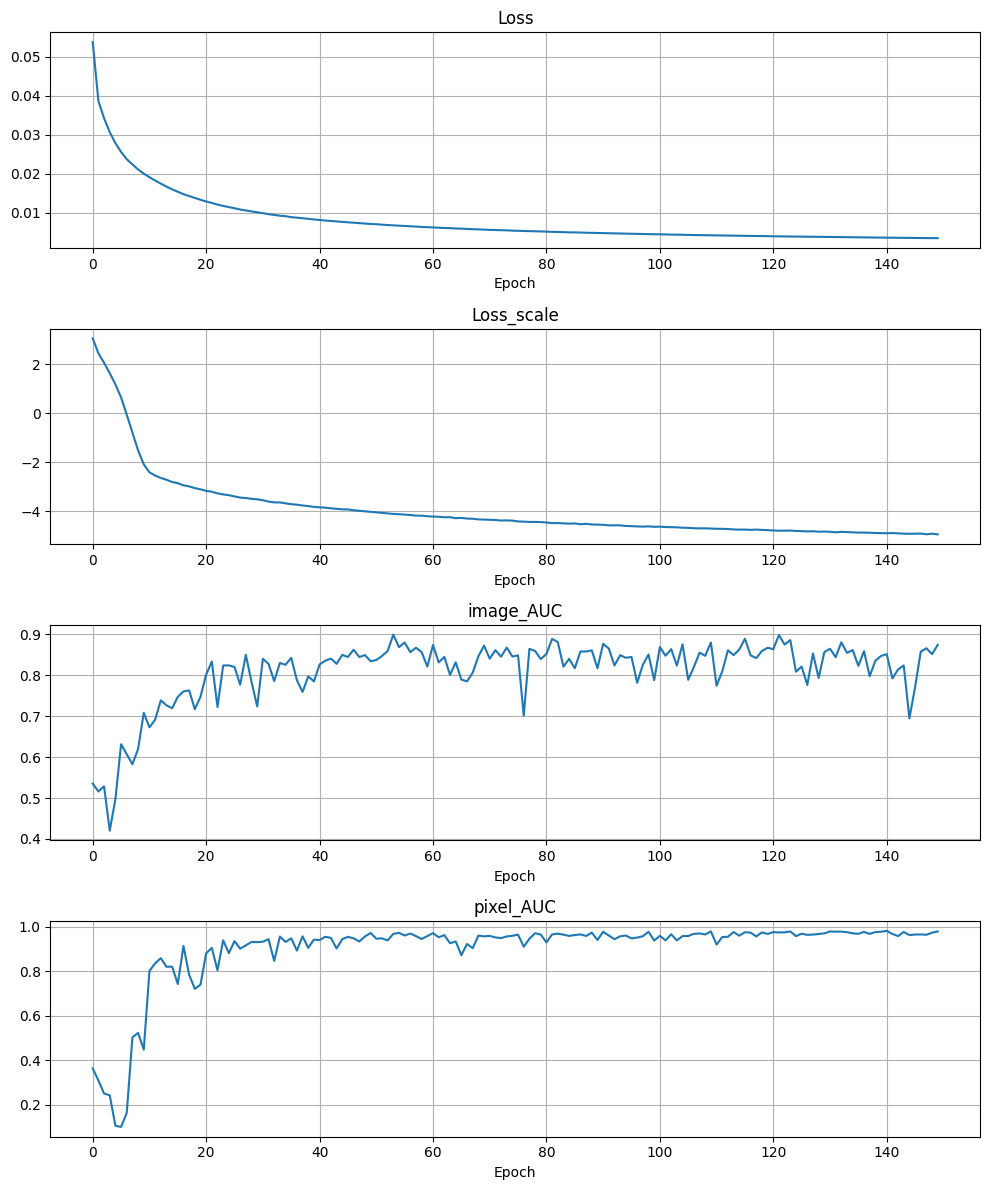

In [3]:
#/home/bule/projects/UTRAD/results/mvtec/contamination_0/DEV_FewData_17_05_24-3-screw/args.log
resdict=read_training_scores('/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw/args.log')

df=pd.DataFrame(resdict)
df['Loss_scale']=np.log(df['Loss_scale'])

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
for i, column in enumerate(df.columns):
    axs[i].plot(df.index, df[column], linestyle='-')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('')
    axs[i].set_title(f'{column}')
    axs[i].grid(True)
    
    
    
    
plt.tight_layout()
plt.show()

## Multiple runs

In [4]:
def plot_multiple_training_scores(filepaths, title='Screw 10 Percent contam', log_scale=True):
    dataframes = []
    for filepath in filepaths:
        resdict = read_training_scores(filepath)
        df = pd.DataFrame(resdict)
        if log_scale:
            df['Loss_scale'] = np.log(df['Loss_scale'])
        dataframes.append(df)

    fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
    legend_labels = []
    for idx, df in enumerate(dataframes):
        for i, column in enumerate(df.columns):
            axs[i].plot(df.index, df[column], linestyle='-', label=f'Run {idx + 1}')
            legend_labels.append(f'Run {idx + 1}')

    for i, column in enumerate(dataframes[0].columns):
        axs[i].set_xlabel('Epoch')
        axs[i].set_ylabel(column)
        axs[i].set_title(f'{column}')
        axs[i].grid(True)
        
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=len(dataframes), fontsize='small')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

## clean

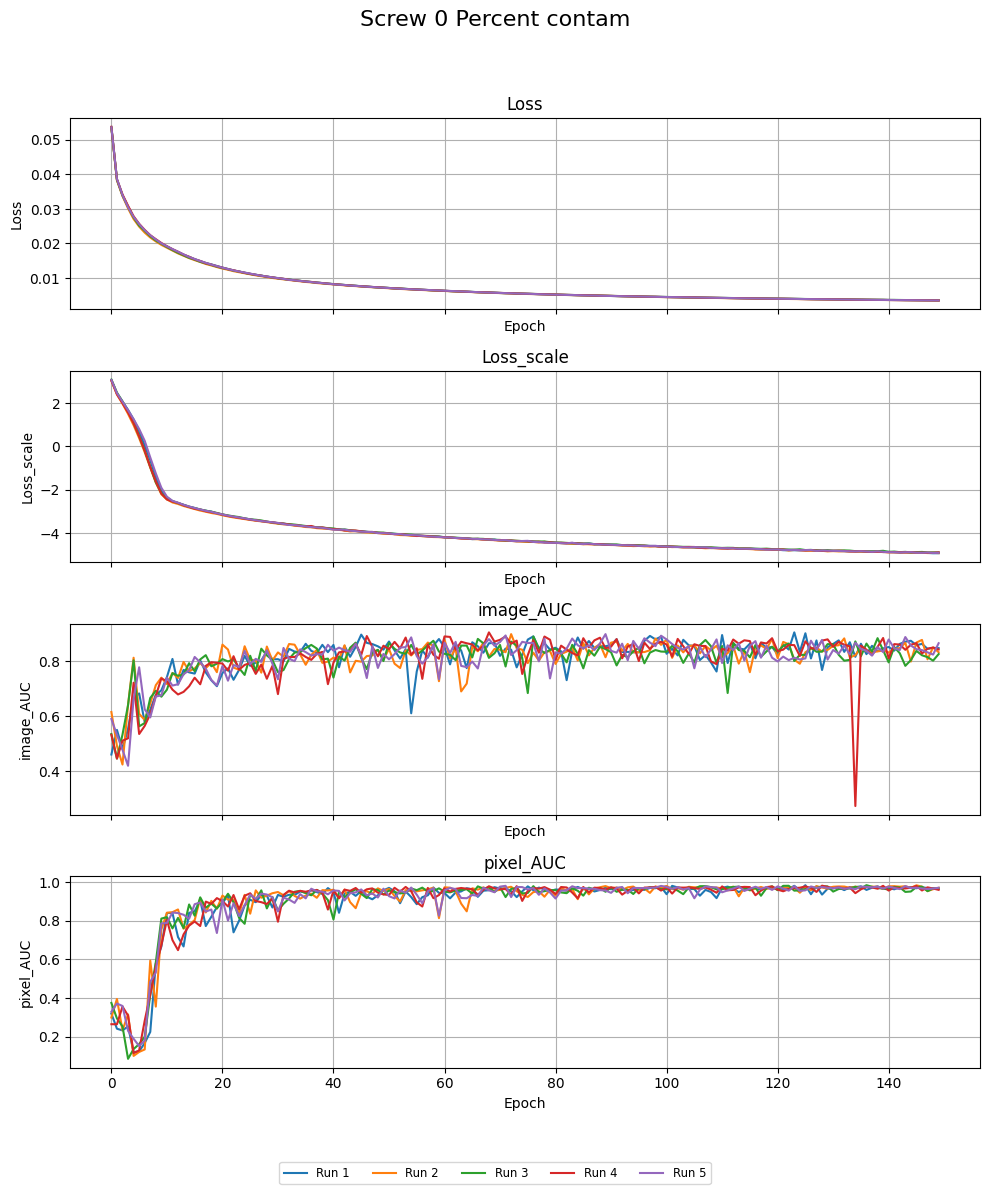

<Axes: >

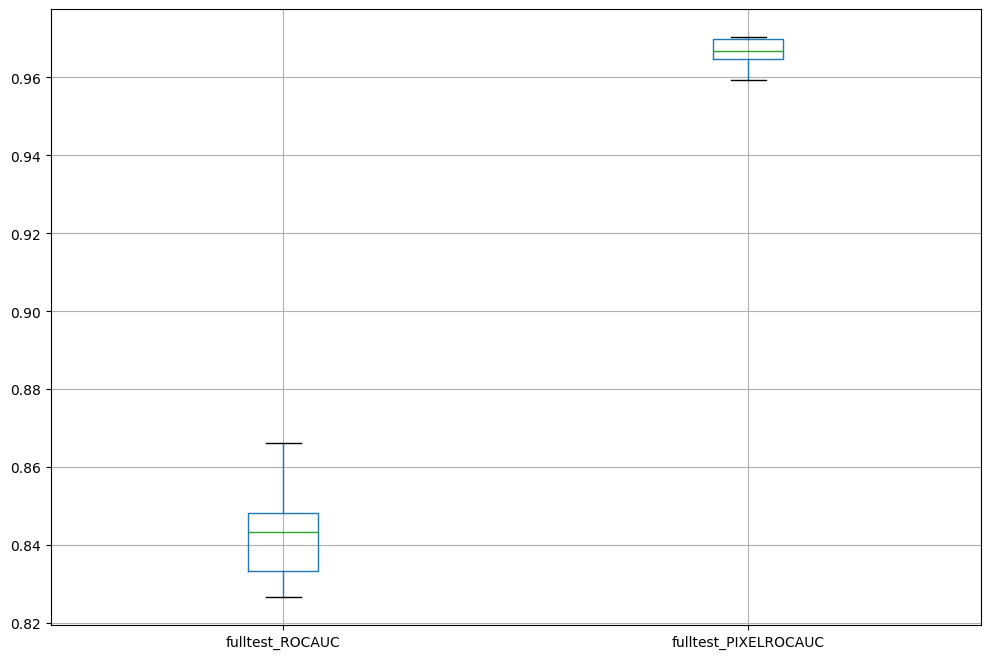

In [42]:
filepaths = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_4-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_5-screw/args.log', 

]

plot_multiple_training_scores(filepaths, title='Screw 0 Percent contam', log_scale=True)
lastrow0cont=last_rows_metric(filepaths)
resdf={'fulltest_ROCAUC':lastrow0cont['image_AUC'],'fulltest_PIXELROCAUC':lastrow0cont['pixel_AUC'] }
resdf=pd.DataFrame(resdf)
plt.figure(figsize=(12, 8))
resdf.boxplot()

#### Contaminated / clean on diffreretn testsets

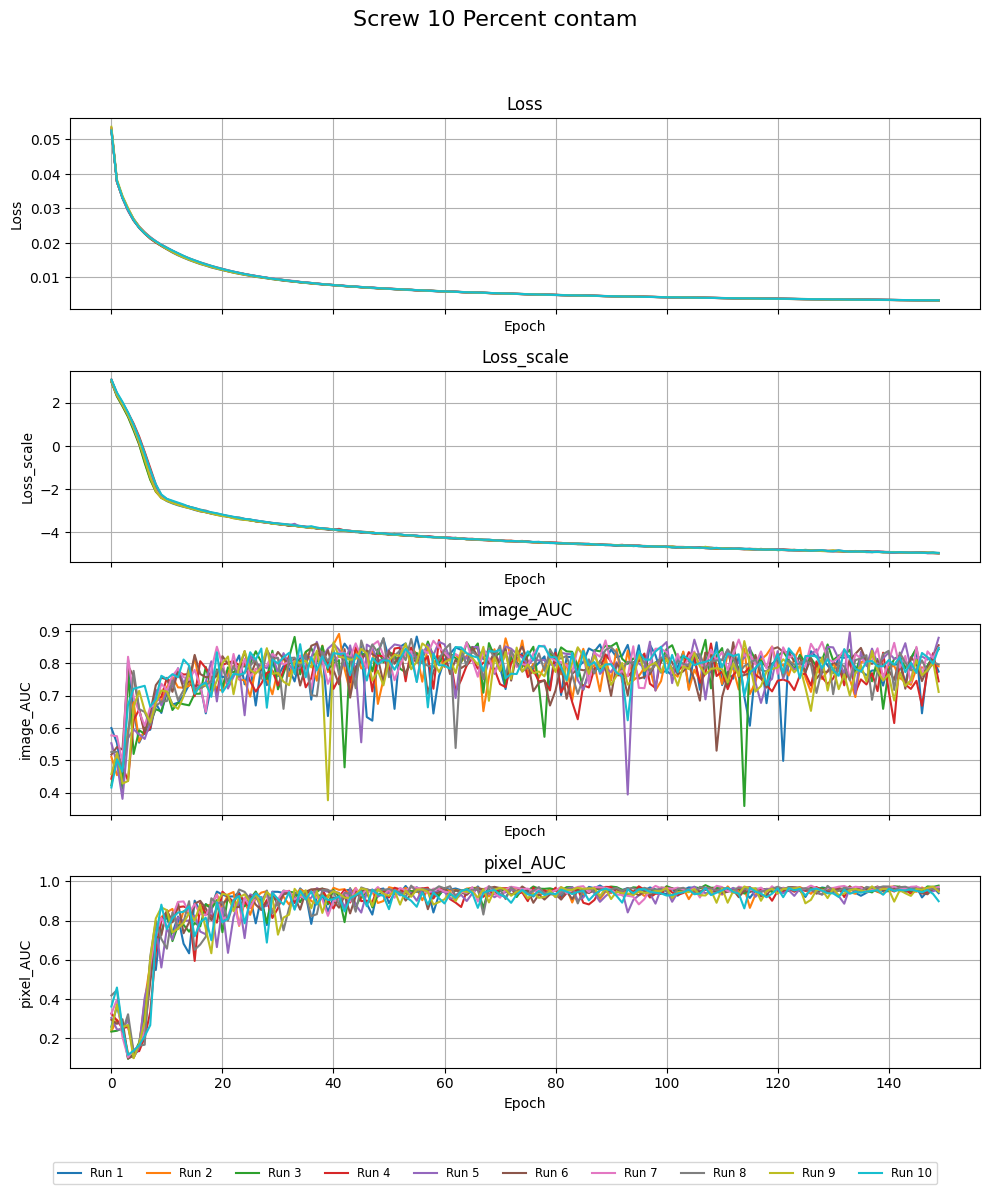

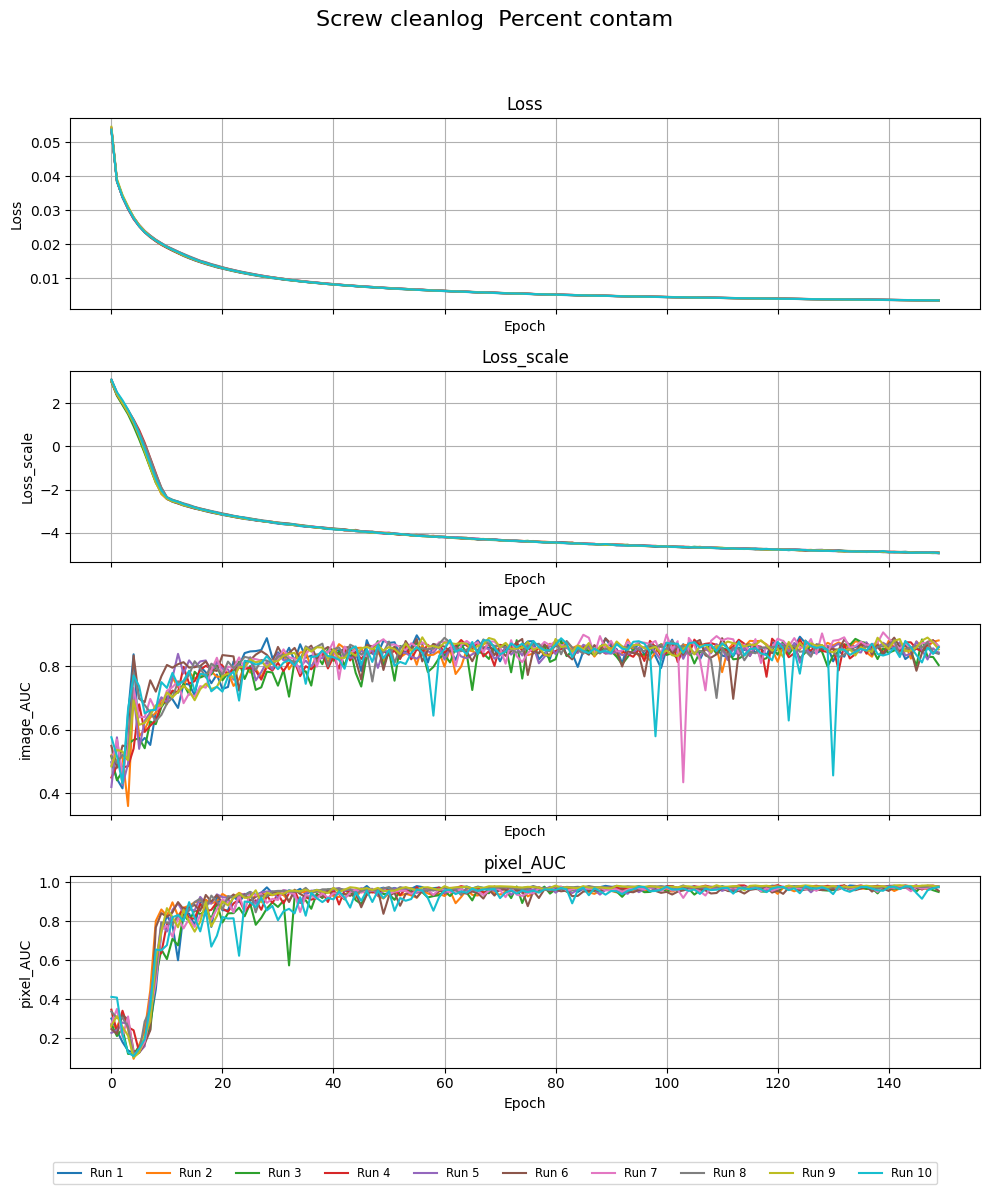

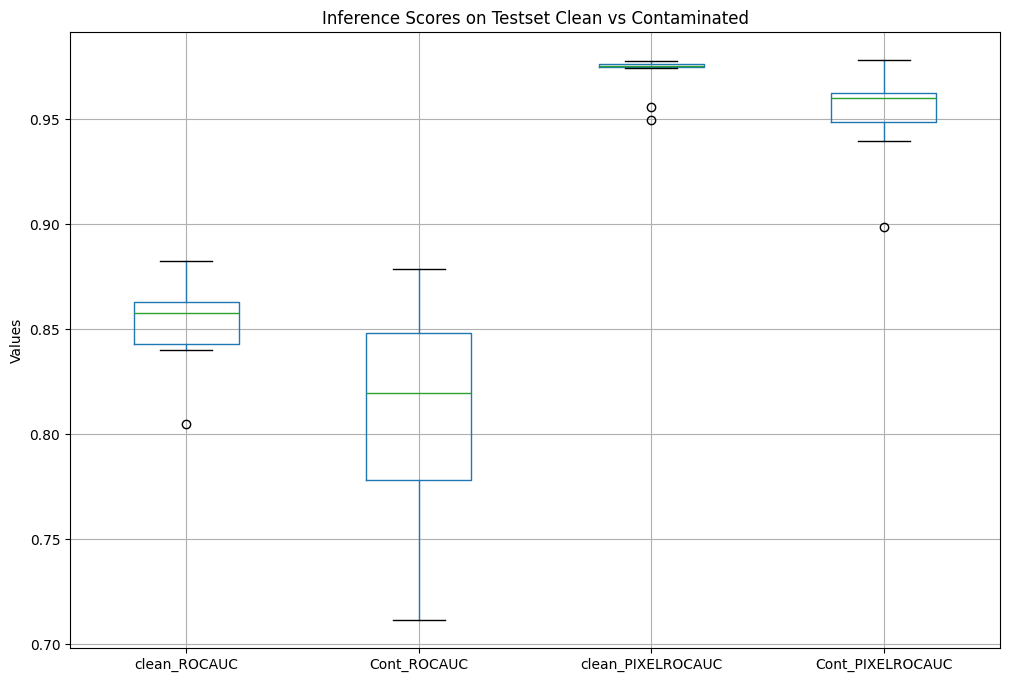

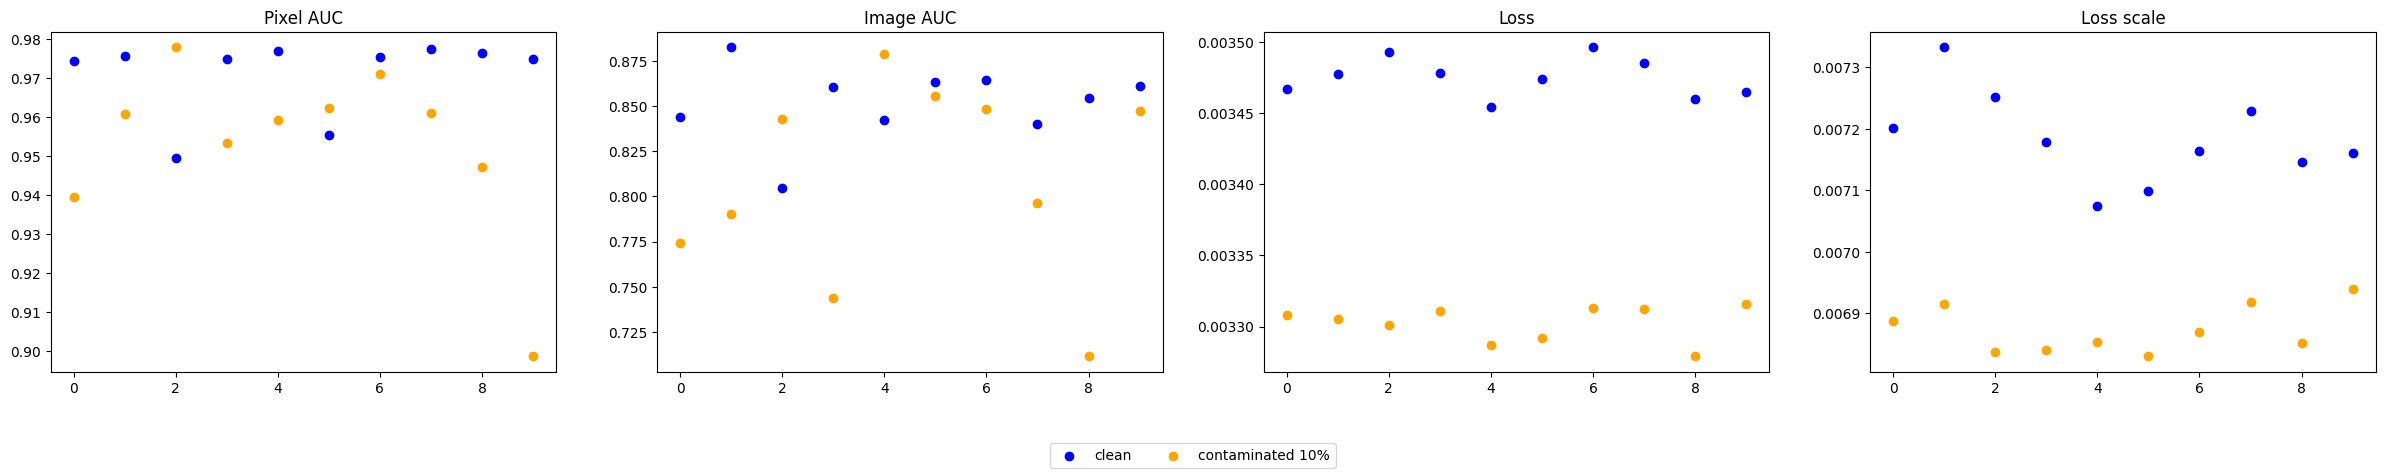

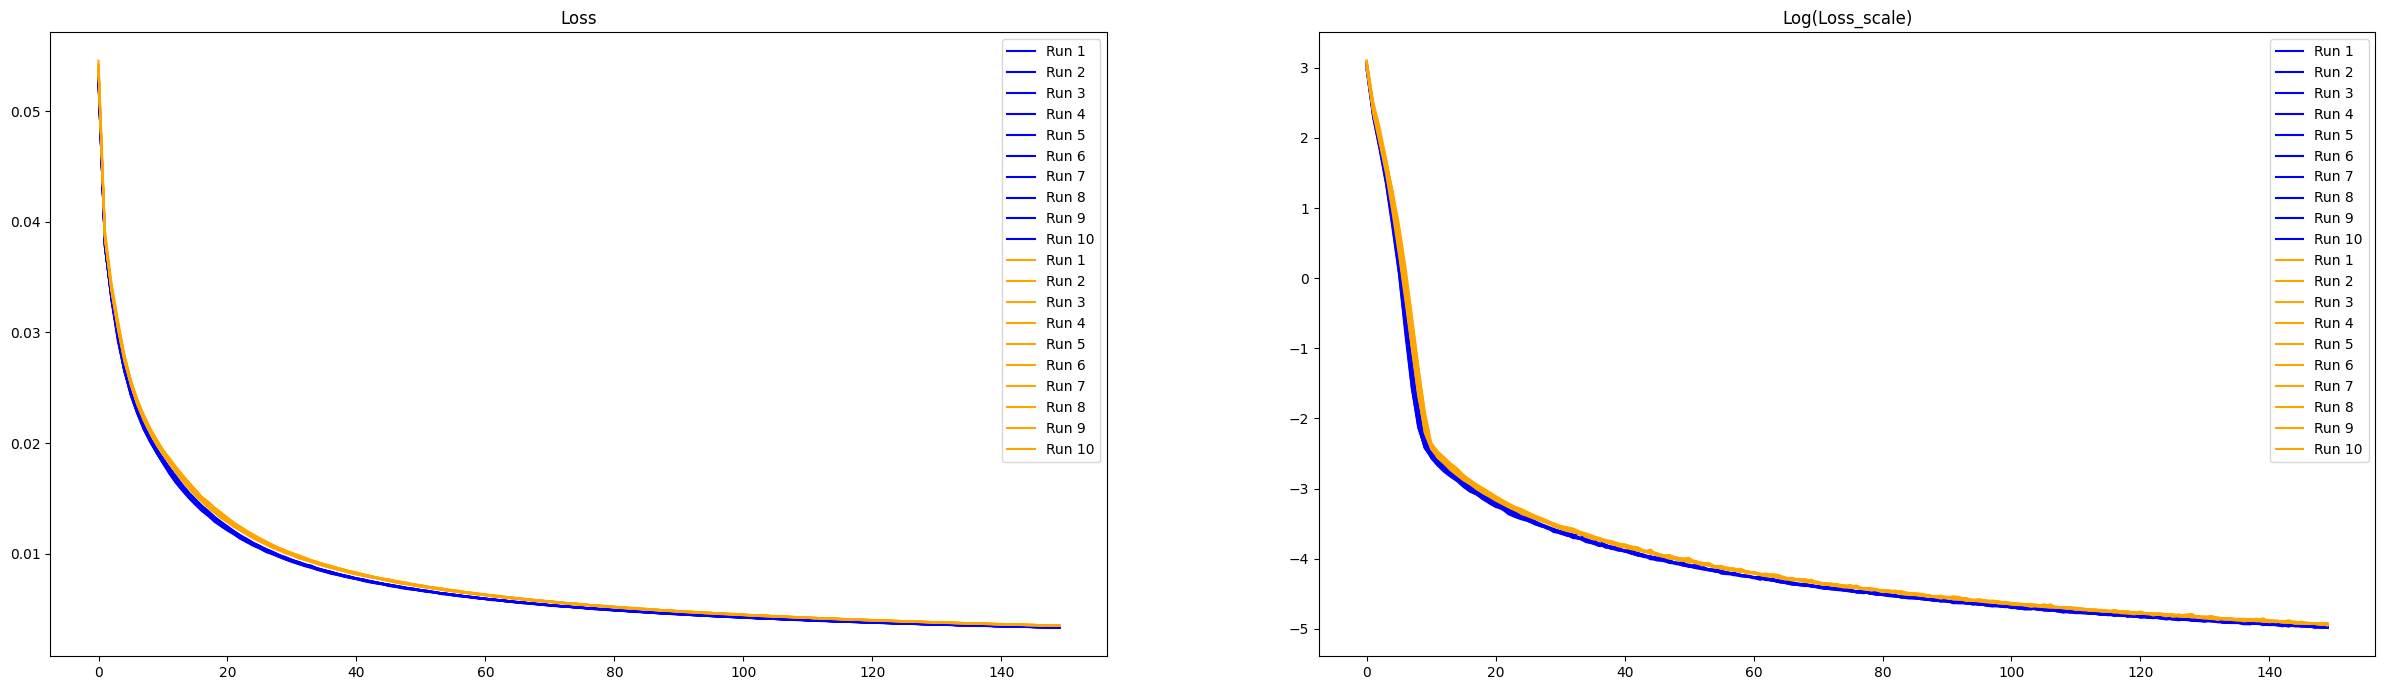

In [45]:
filepaths_clean = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw/args.log', 
]

plot_multiple_training_scores(filepaths_clean, title='Screw 10 Percent contam', log_scale=True)
lastrow_cont=last_rows_metric(filepaths_clean)

filepaths_cont = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw/args_cleaned.log', 
]

plot_multiple_training_scores(filepaths_cont, title='Screw cleanlog  Percent contam', log_scale=True)
lastrow_clean=last_rows_metric(filepaths_cont)

resdf={'clean_ROCAUC':lastrow_clean['image_AUC'],'Cont_ROCAUC':lastrow_cont['image_AUC'],'clean_PIXELROCAUC':lastrow_clean['pixel_AUC'], 'Cont_PIXELROCAUC':lastrow_cont['pixel_AUC'] }
resdf=pd.DataFrame(resdf)
plt.figure(figsize=(12, 8))
resdf.boxplot()
plt.title('Inference Scores on Testset Clean vs Contaminated')
plt.ylabel('Values')
plt.grid(True)
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(30, 5))

sc1 = axes[0].scatter(np.arange(10), lastrow_clean['pixel_AUC'], label='clean',color='blue')
sc2 = axes[0].scatter(np.arange(10), lastrow_cont['pixel_AUC'], label='contaminated 10%',color='orange')
axes[0].set_title('Pixel AUC')

sc3 = axes[1].scatter(np.arange(10), lastrow_clean['image_AUC'], label='clean',color='blue')
sc4 = axes[1].scatter(np.arange(10), lastrow_cont['image_AUC'], label='contaminated 10%',color='orange')
axes[1].set_title('Image AUC')

sc5 = axes[2].scatter(np.arange(10), lastrow_clean['Loss'], label='clean',color='blue')
sc6 = axes[2].scatter(np.arange(10), lastrow_cont['Loss'], label='contaminated 10%',color='orange')
axes[2].set_title('Loss')

sc7 = axes[3].scatter(np.arange(10), lastrow_clean['Loss_scale'], label='clean',color='blue')
sc8 = axes[3].scatter(np.arange(10), lastrow_cont['Loss_scale'], label='contaminated 10%',color='orange')
axes[3].set_title('Loss scale')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

plt.subplots_adjust(bottom=0.2)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(30, 8))

# First subplot for Loss
for i, path in enumerate(filepaths_clean):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[0].plot(np.arange(len(df)), df['Loss'], label=f'Run {i + 1}', color='blue')

for i, path in enumerate(filepaths_cont):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[0].plot(np.arange(len(df)), df['Loss'], label=f'Run {i + 1}', color='orange')

axes[0].set_title('Loss')
axes[0].legend(loc='upper right')

# Second subplot for log(Loss_scale)
for i, path in enumerate(filepaths_clean):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[1].plot(np.arange(len(df)), np.log(df['Loss_scale']), label=f'Run {i + 1}', color='blue')

for i, path in enumerate(filepaths_cont):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[1].plot(np.arange(len(df)), np.log(df['Loss_scale']), label=f'Run {i + 1}', color='orange')

axes[1].set_title('Log(Loss_scale)')
axes[1].legend(loc='upper right')

plt.subplots_adjust(bottom=0.1)
plt.show()

### same seed only modelseed change

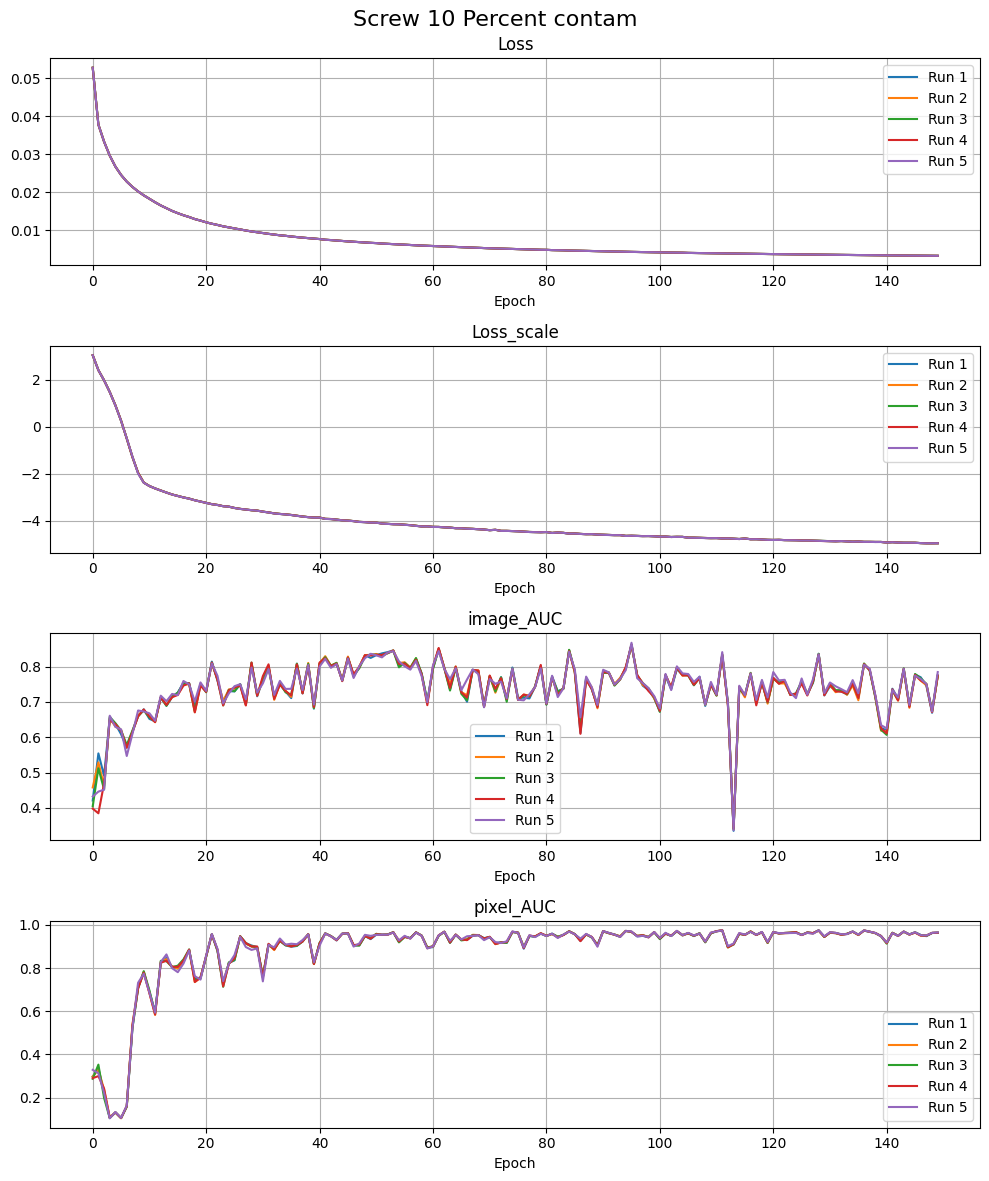

In [5]:
filepaths = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_5-screw/args.log'
]
plot_multiple_training_scores(filepaths, title='Screw 10 Percent contam', log_scale=True)

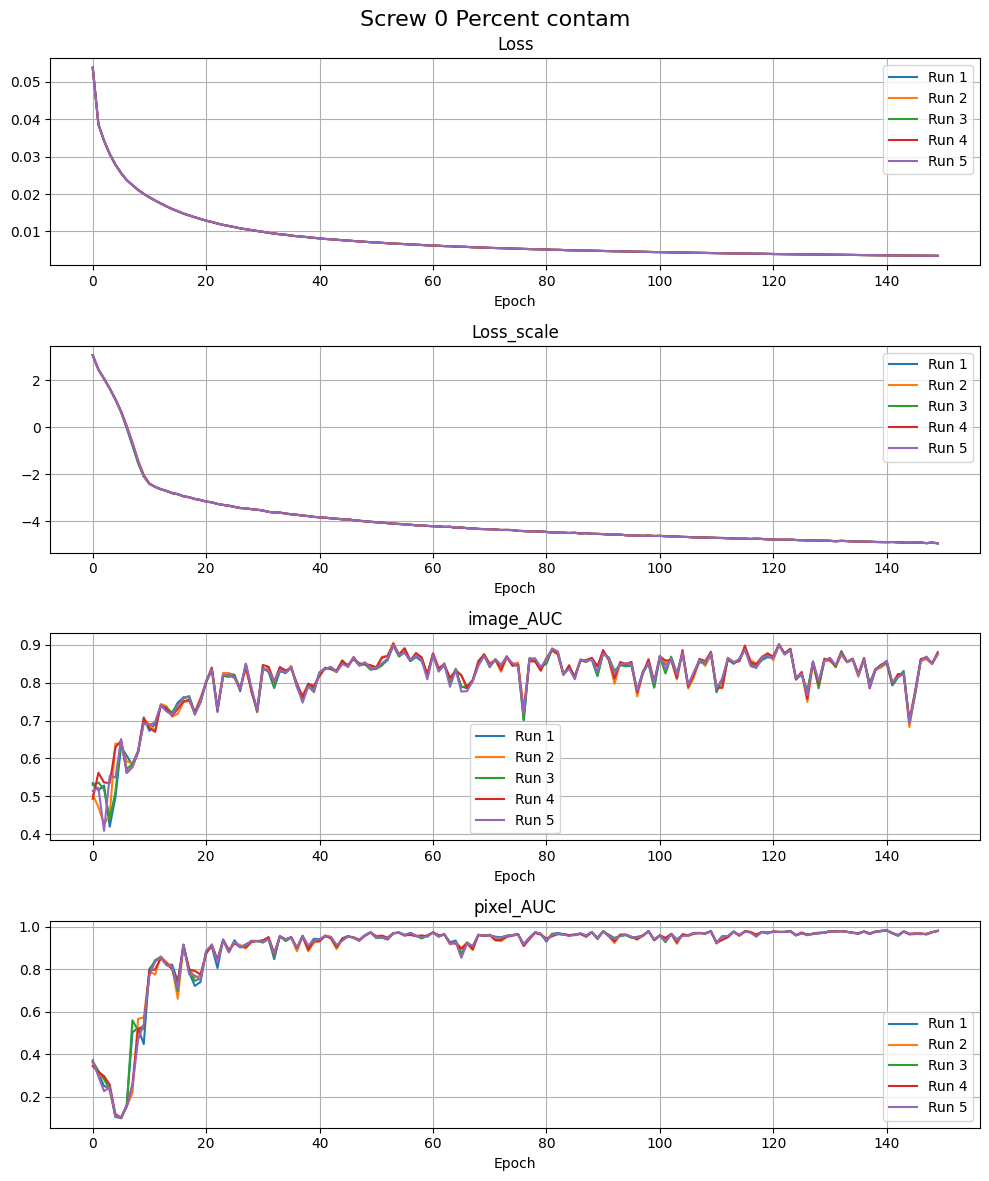

In [6]:
filepaths = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_2-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_3-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_5-screw/args.log',
]
plot_multiple_training_scores(filepaths, title='Screw 0 Percent contam', log_scale=True)

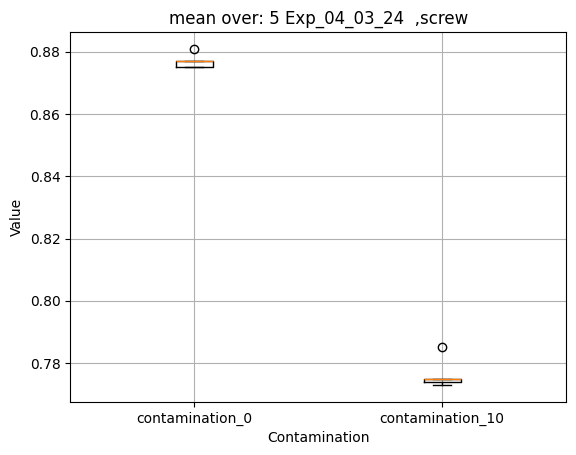

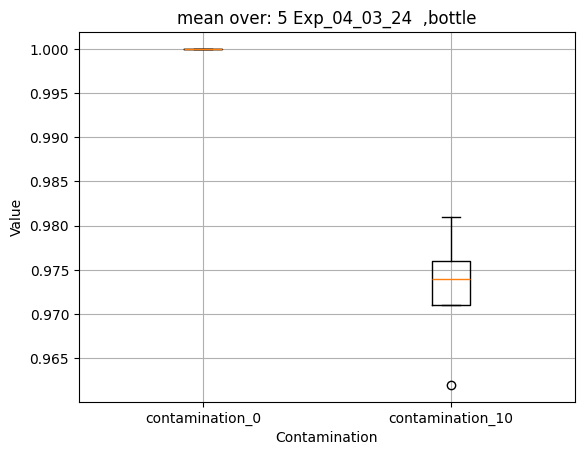

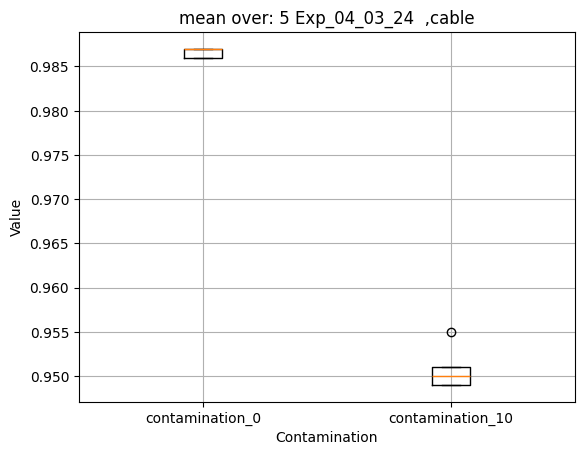

In [3]:
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="screw" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="bottle",reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="cable" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])

## single runs 

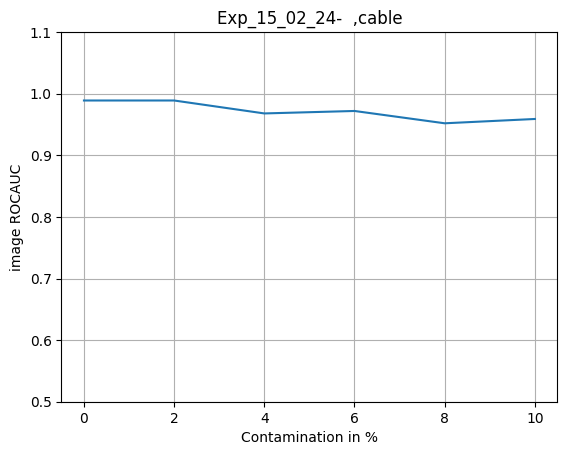

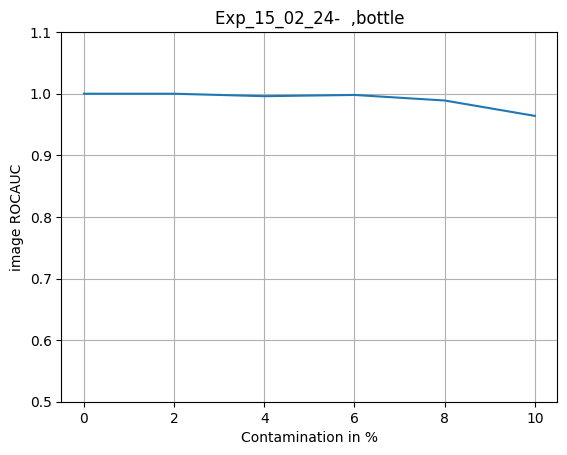

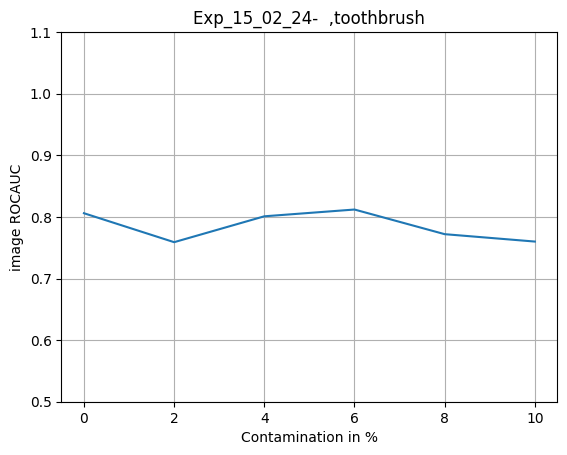

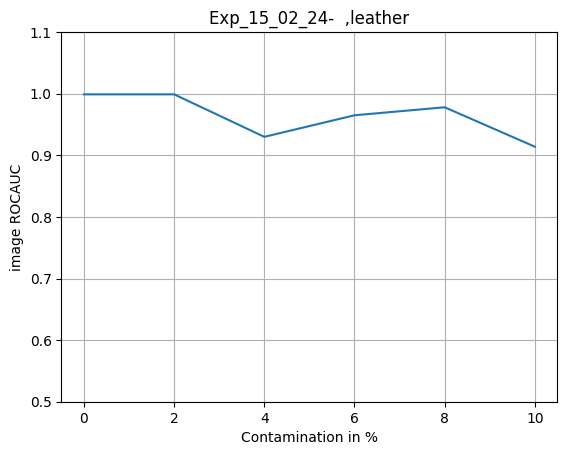

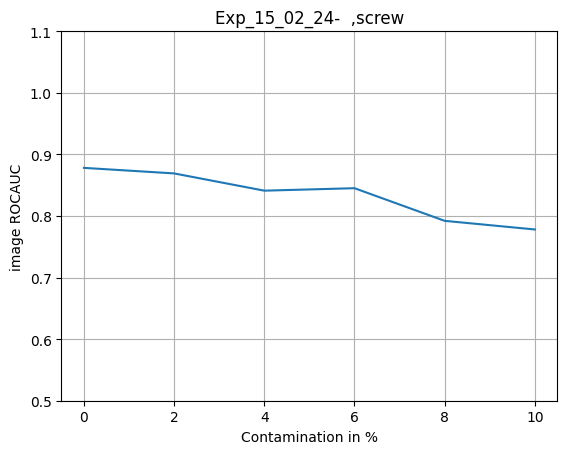

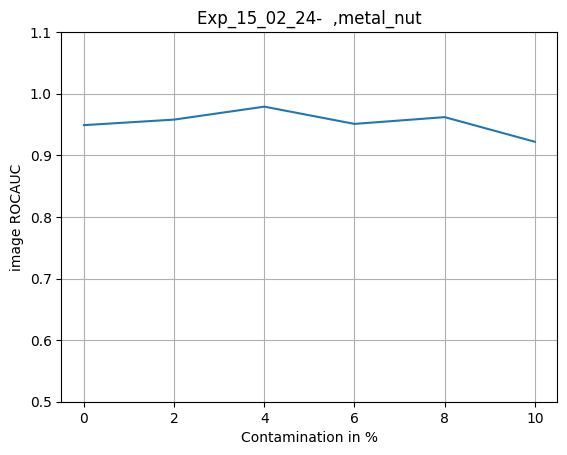

In [3]:
#contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="cable")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="bottle")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="toothbrush")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="leather")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="screw")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="metal_nut")

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


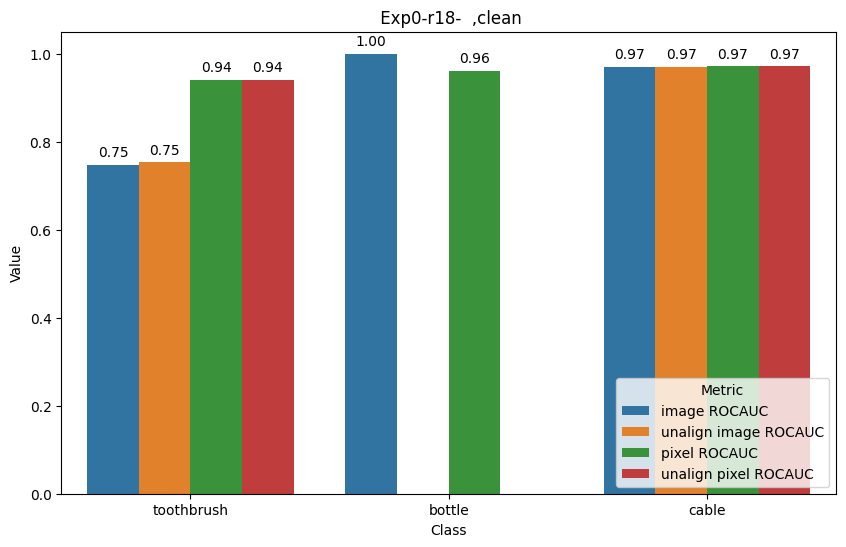

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


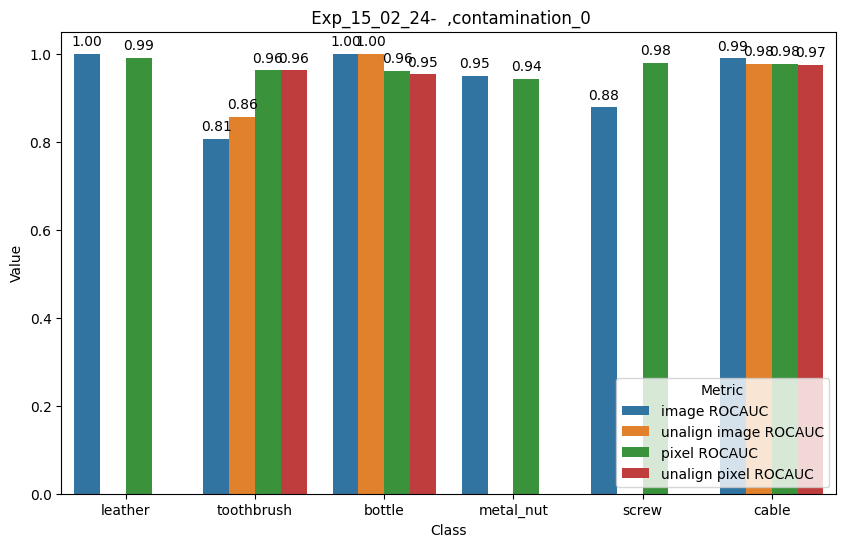

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


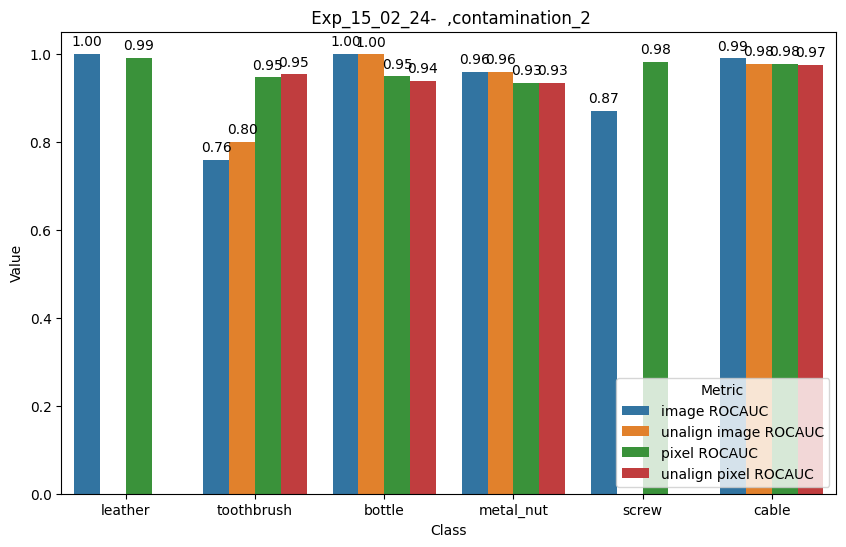

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


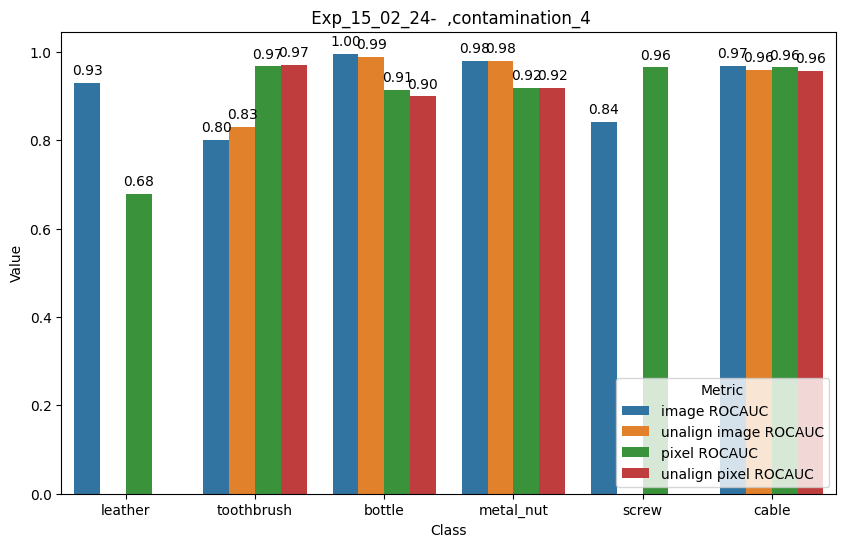

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


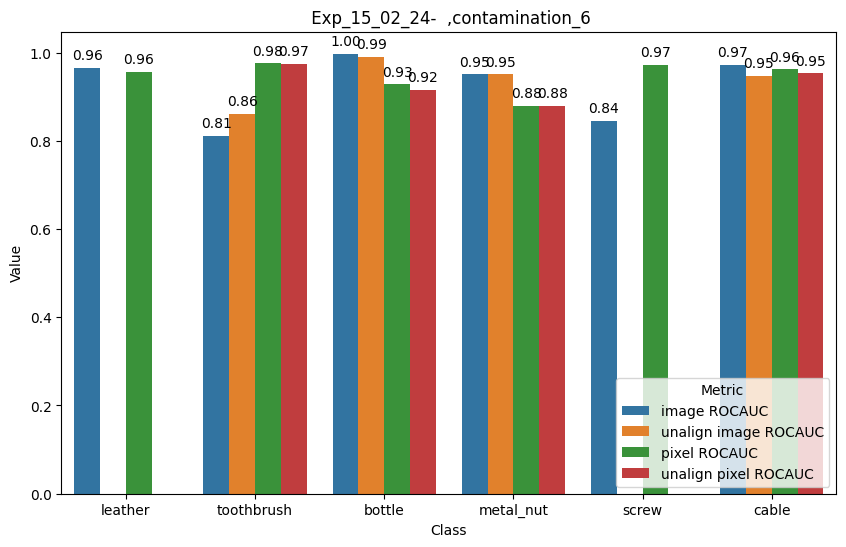

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


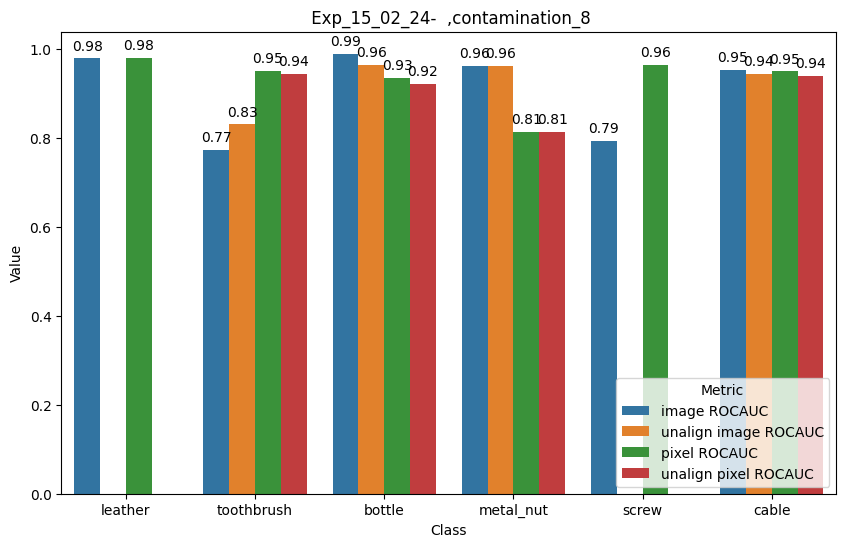

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


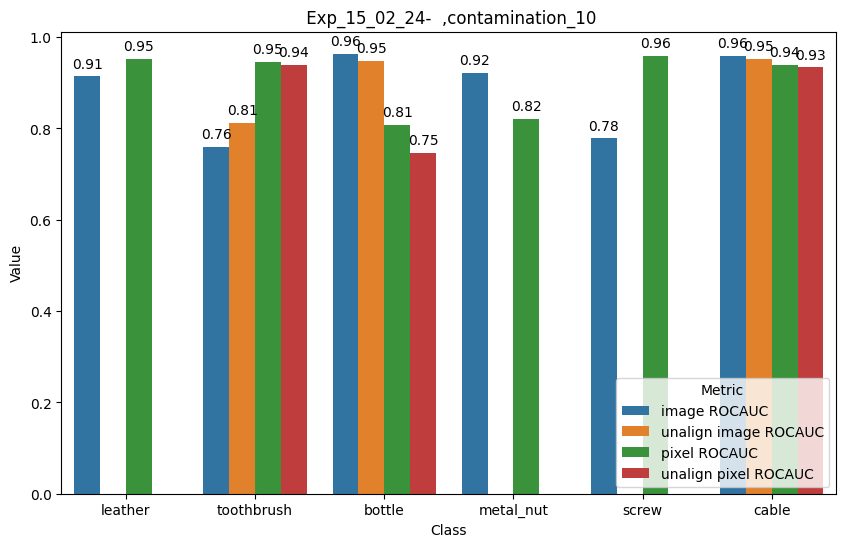

In [4]:
plot_vals_per_category(RESPATH,dataset,run="clean",experiment="Exp0-r18-")
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_2",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_4",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_6",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_8",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_10",experiment="Exp_15_02_24-")

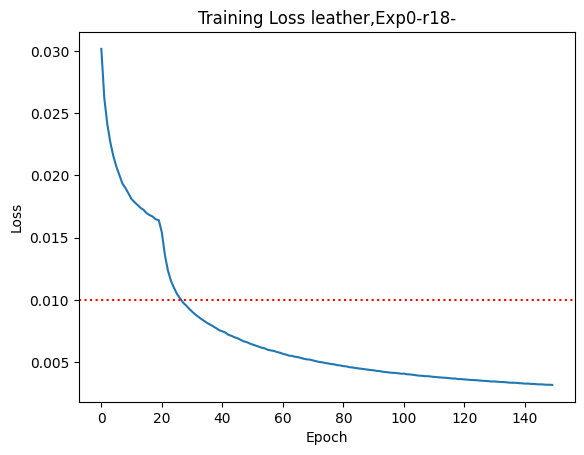

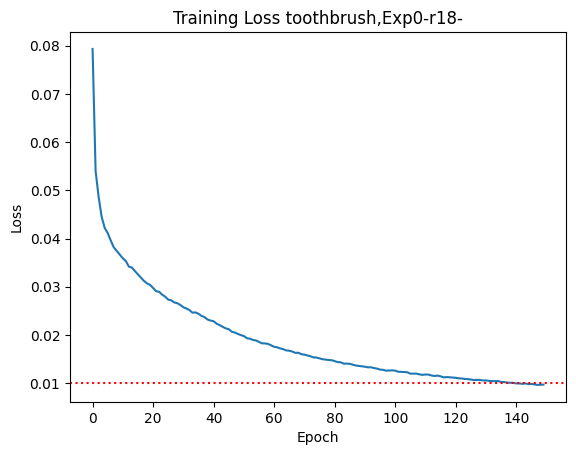

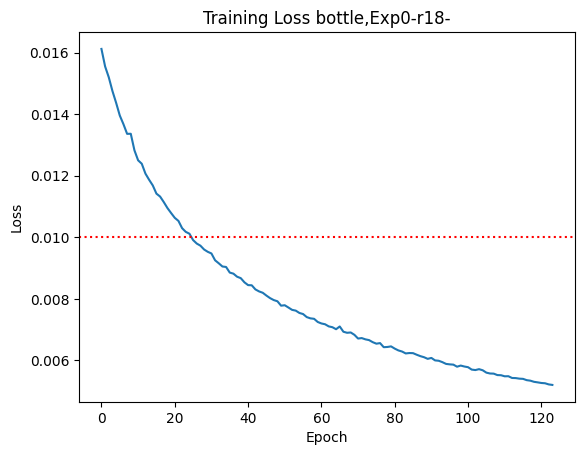

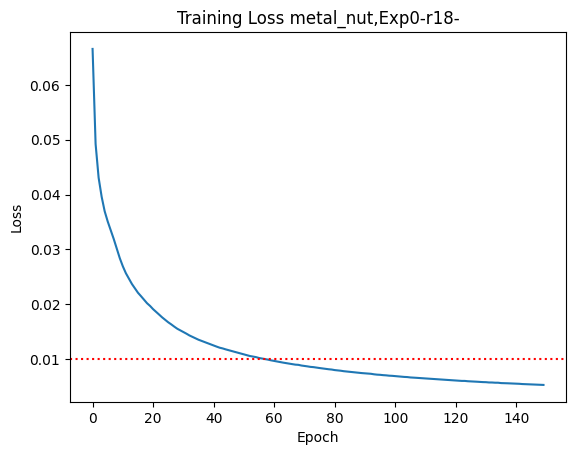

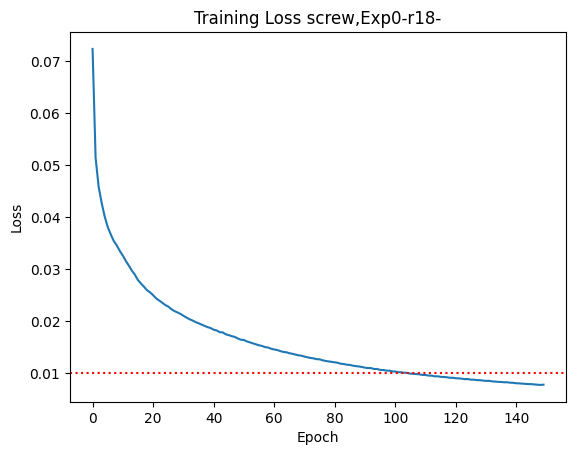

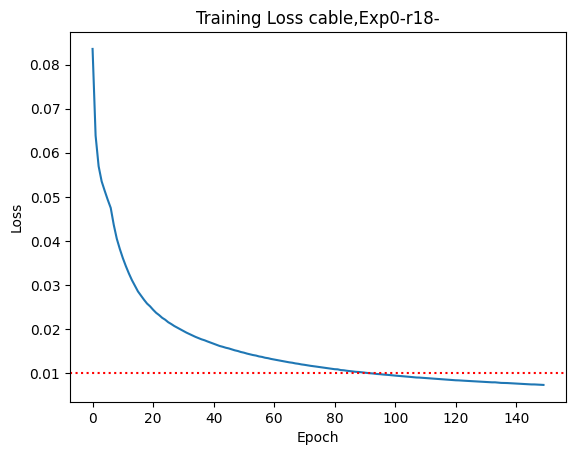

In [5]:
plot_losses(RESPATH,dataset='mvtec',run="clean",experiment="Exp0-r18-")

In [6]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_0",experiment="Exp_11_02_24-")

FileNotFoundError: [Errno 2] No such file or directory: 'results/mvtec/contamination_0/Exp_11_02_24-leather/args.log'

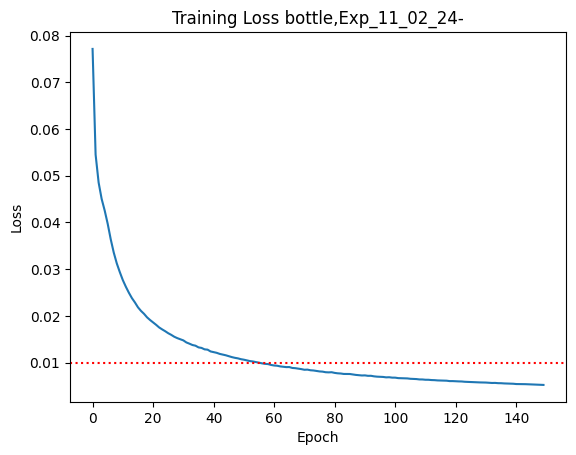

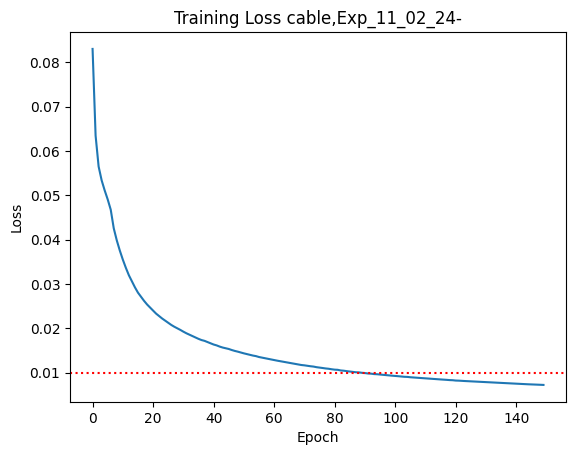

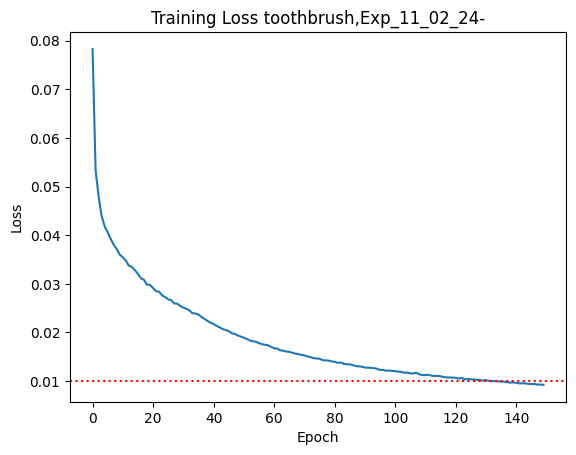

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_6",experiment="Exp_11_02_24-")